In [1]:
import seaborn as sb
import scipy
import math
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt

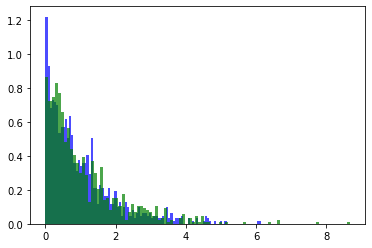

In [31]:
#5.1(a)
l = 1 #F(x) = 1 - e^(-lx),  x >= 0   =>   F^(-1)(x) = [ ln(1 - x) ] / (-l)
def f(x, l):
    return (math.log(1 - x, math.exp(1))) / (-l)
n = 1000
x = np.arange(-10,10,0.1)
temp = scipy.stats.expon.rvs(scale=1/l, size=n)
uni = scipy.stats.uniform.rvs(size=n)
gen = np.array([f(t,l) for t in uni])
plt.hist(temp, density=True,alpha=0.7,color='blue',bins=round(n/10))
plt.hist(gen, density=True,alpha=0.7,color='green',bins=round(n/10))
plt.show()

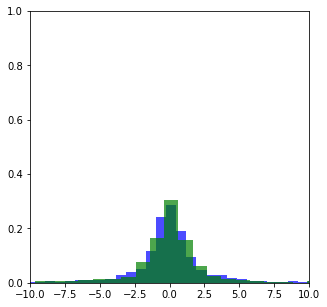

In [32]:
#5.1(б)
def f(x):
    return math.tan(math.pi * x - math.pi / 2)
n = 1000
x = np.arange(-10,10,0.1)
temp = scipy.stats.cauchy.rvs(size=n)
uni = scipy.stats.uniform.rvs(size=n)
gen = np.array([f(t) for t in uni])
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(temp, density=True,alpha=0.7,color='blue',bins=n)
ax.hist(gen, density=True,alpha=0.7,color='green',bins=n)
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.show()

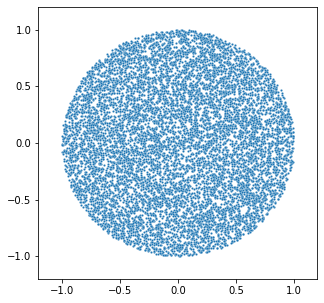

In [56]:
#5.4(a)
def f(x, y): 
    if x*x + y*y <= 1:
        return 1/(math.pi)
    else:
        return 0
def g(x, y):
    if -1 <= x <= 1 and -1 <= y <= 1:
        return 1/4
    else:
        return 0
#f(x) <= 2g(x), где g(x) = 1/4 - равномерное на квадрате
n = 10000
c = 2
k = 0
X = []
Y = []
while k < n:
    t1 = scipy.stats.uniform.rvs(loc=-1,scale=2,size=1)[0]
    t2 = scipy.stats.uniform.rvs(loc=-1,scale=2,size=1)[0]
    bern = scipy.stats.bernoulli.rvs(f(t1,t2)/(c * g(t1,t2)),size=1)[0]
    if bern == 1:
        X.append(t1)
        Y.append(t2)
        k += 1
    else:
        continue
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
sb.scatterplot(x=X,y=Y,s=5)
plt.show()

<AxesSubplot:>

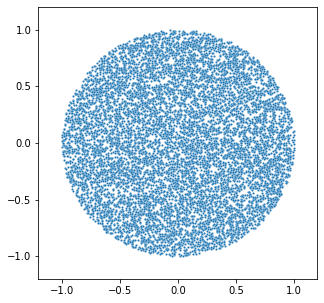

In [68]:
#5.2(в)
r = scipy.stats.uniform.rvs(size=10000)
phi = scipy.stats.uniform.rvs(scale=2 * math.pi, size=10000)
X = [math.sqrt(r[i]) * math.cos(phi[i]) for i in range(len(r))]
Y = [math.sqrt(r[i]) * math.sin(phi[i]) for i in range(len(r))]
fig, ax = plt.subplots(figsize=(5,5))
plt.xlim([-1.2, 1.2])
plt.ylim([-1.2, 1.2])
sb.scatterplot(x=X,y=Y,s=5)

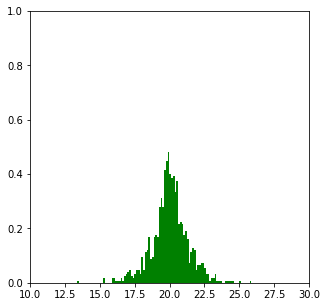

In [27]:
#5.3(a)
a = 1
b = 20
n = 1000
bern = scipy.stats.bernoulli.rvs(1/2,size=n)
x = []
for i in range(n):
    if bern[i] == 0:
        x.append(scipy.stats.expon.rvs(scale=1/a,size=1,loc=b)[0])
    else:
        x.append(-scipy.stats.expon.rvs(scale=1/a,size=1,loc=-b)[0])
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(x, density=True,color='green',bins = round(n/10))
plt.xlim([-10 + b, 10 + b])
plt.ylim([0, 1])
plt.show()

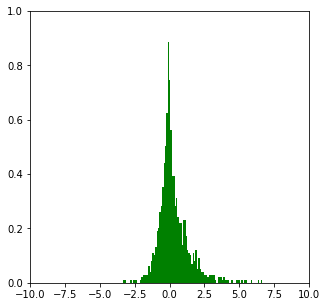

In [28]:
#5.3(б)
a = 1
n = 1000
bern = scipy.stats.bernoulli.rvs(1/2,size=n)
x = []
for i in range(n):
    if bern[i] == 0:
        x.append(scipy.stats.expon.rvs(scale=1,size=1)[0])
    else:
        x.append(-scipy.stats.expon.rvs(scale=1/2,size=1)[0])
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(x, density=True,color='green',bins = round(n/10))
plt.xlim([-10, 10])
plt.ylim([0, 1])
plt.show()

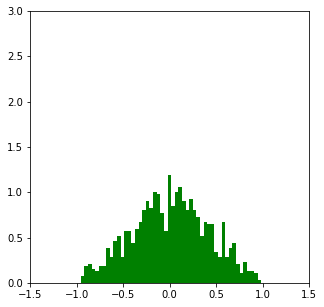

In [53]:
#5.4(a)
def f(x):
    if -1 <= x <= 1:
        return 1 - abs(x)
    else:
        return 0
def g(x):
    if -1 <= x <= 1:
        return 1/2
    else:
        return 0
#f(x) <= 2g(x), где g(x) = 1/2 * I{-1 <= x <= 1} - равномерное на [-1, 1]
n = 1000
c = 2
k = 0
x = []
while k < n:
    y = scipy.stats.uniform.rvs(loc=-1,scale=2,size=1)[0]
    bern = scipy.stats.bernoulli.rvs(f(y)/(c * g(y)),size=1)[0]
    if bern == 1:
        x.append(y)
        k += 1
    else:
        continue
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(x, density=True,color='green',bins=round(n/20))
plt.xlim([-1.5, 1.5])
plt.ylim([0, 3])
plt.show()